## Example Implementation of a Decision Tree

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
#graphviz requires both pip install and sudo apt-get install graphviz

In [2]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.20.0.


In [3]:
balance_data = pd.read_csv(
'https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data',
                           sep= ',', header= None)

In [4]:
balance_data.head()

,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [5]:
#Slice the data
X = balance_data.values[:, 1:5]
Y = balance_data.values[:,0]

In [6]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

## Predictions with different criteria

## Using Gini

In [7]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

DecisionTreeClassifier():  parameters are:

- criterion: Function to measure the quality of a split. 
    - Sklearn supports “gini” criteria for Gini Index & “entropy” for Information Gain. 
    - By default, it takes “gini” value.
- splitter: Strategy to choose the split at each node. 
    - Supports “best” value to choose the best split & “random” to choose the best random split. 
    - By default, it takes “best” value.
- max_features: Number  of features to consider when looking for the best split. 
    - We can input integer, float, string & None value.
    - If an integer is inputted then it considers that value as max features at each split.
    - If float value is taken then it shows the percentage of features at each split.
    - If “auto” or “sqrt” is taken then max_features=sqrt(n_features).
    - If “log2” is taken then max_features= log2(n_features).
    - If None, then max_features=n_features. 
    - By default, it takes “None” value.
- max_depth: The max_depth parameter denotes maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. By default, it takes “None” value.
- min_samples_split: This tells above the minimum no. of samples reqd. to split an internal node. If an integer value is taken then consider min_samples_split as the minimum no. If float, then it shows percentage. By default, it takes “2” value.
- min_samples_leaf: The minimum number of samples required to be at a leaf node. If an integer value is taken then consider min_samples_leaf as the minimum no. If float, then it shows percentage. By default, it takes “1” value.
- max_leaf_nodes: It defines the maximum number of possible leaf nodes. If None then it takes an unlimited number of leaf nodes. By default, it takes “None” value.
- min_impurity_split: It defines the threshold for early stopping tree growth. A node will split if its impurity is above the threshold otherwise it is a leaf.

In [8]:
clf_gini.predict([[4, 4, 3, 3]])

array(['R'], dtype=object)

In [9]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini

array(['R', 'L', 'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'R', 'L', 'L',
       'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L',
       'L', 'L', 'R', 'L', 'L', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'L',
       'L', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'R',
       'L', 'R', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'R', 'L', 'L', 'L',
       'L', 'L', 'R', 'R', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R',
       'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R',
       'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'R',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L',
       'R', 'L', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'R', 'R', 'R',
       'L', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'R', 'R', 'R', 'R', 'L',
       'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L

## Using entropy

In [10]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [11]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array(['R', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'R', 'R', 'R', 'R', 'L',
       'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L',
       'R', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'R',
       'L', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'L', 'R',
       'L', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R',
       'L', 'L', 'R', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R',
       'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'L', 'R',
       'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R',
       'L', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'R',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L',
       'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'R', 'R', 'R', 'R',
       'L', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L',
       'R', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'R', 'R

## Accuracy Score

-- **accuracy_score()** will be used to print accuracy of Decision Tree algorithm. 
- By accuracy, we mean the ratio of the correctly predicted data points to all the predicted data points. 
- Accuracy as a metric helps to understand the effectiveness of our algorithm.

In [12]:
print( "Accuracy (GINI) is ", accuracy_score(y_test,y_pred_gini)*100)

Accuracy (GINI) is  73.40425531914893


In [13]:
print( "Accuracy  (Entropy)is ", accuracy_score(y_test,y_pred_en)*100)

Accuracy  (Entropy)is  70.74468085106383


## Ejemplos de graphviz

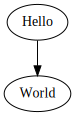

In [16]:
# hello.py - http://www.graphviz.org/content/hello

from graphviz import Digraph

g = Digraph('G', filename='hello.gv')

g.edge('Hello', 'World')

#g.view()
g

In [18]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

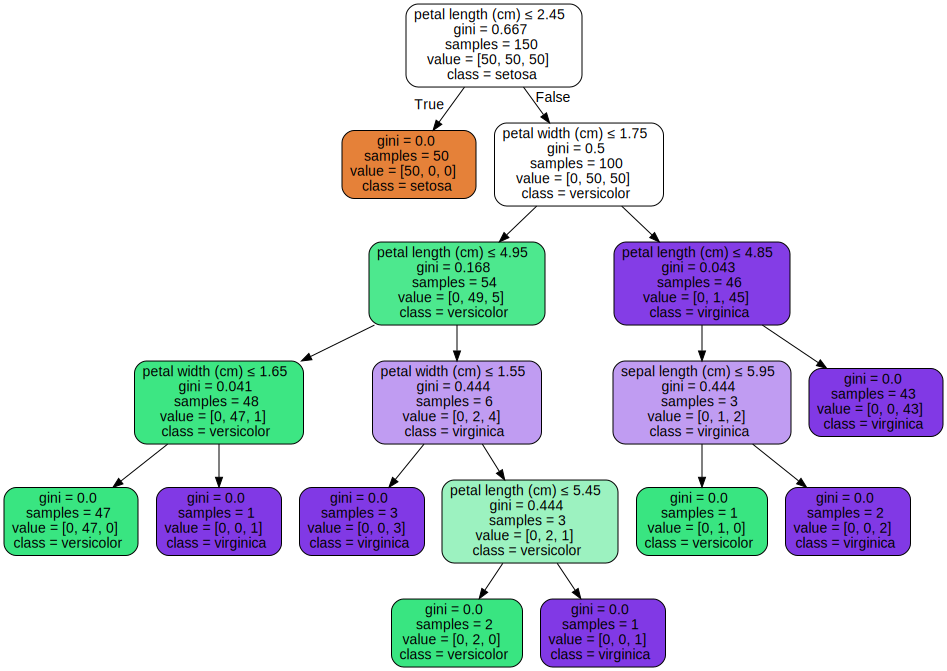

In [19]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

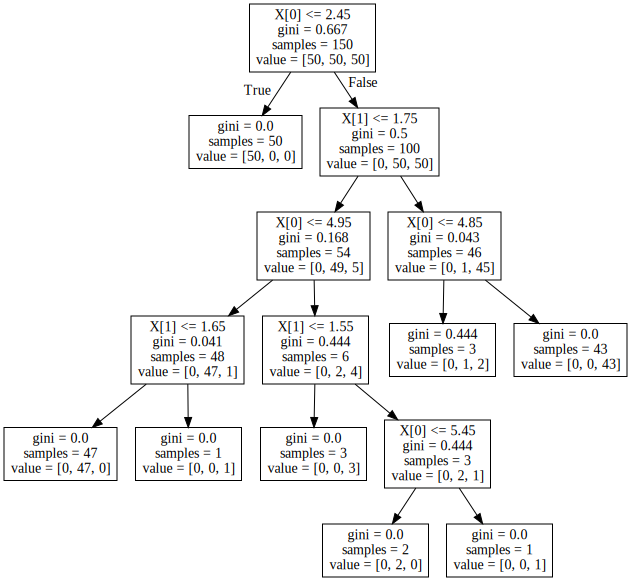

In [21]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
graph

For each pair of iris features, the decision tree 
learns decision boundaries made of combinations of simple thresholding rules inferred from the training samples.



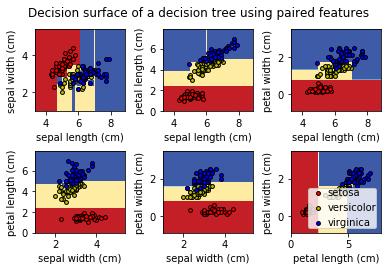

In [20]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
        
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()
